# Подключаем необходимые модули

In [ ]:
import os # Для работы с файлами
import numpy as np # Для работы с данными 
import pandas as pd # Для работы с таблицами
import matplotlib.pyplot as plt # Для вывода графиков
%matplotlib inline

from tensorflow.keras.utils import plot_model, to_categorical  # Для визуализации модели и работы с категориальными данными 
from tensorflow.keras.models import Sequential # Полносвязная модель
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation # Слои для сети
from tensorflow.keras.preprocessing.text import Tokenizer # Методы для работы с текстами и преобразования их в последовательности
from tensorflow.keras.preprocessing.sequence import pad_sequences # Метод для работы с последовательностями
from tensorflow.keras.optimizers import Adam, Adadelta # оптимизаторы
from tensorflow.keras.callbacks import ModelCheckpoint, Callback

from sklearn.preprocessing import LabelEncoder # Метод кодирования тестовых лейблов
from sklearn.model_selection import train_test_split # Для разделения выборки на тестовую и обучающую

from google.colab import drive, files # Для работы с файлами 

# Монтируем гугл-диск

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


# Настройки

In [ ]:
ROOT_PATH = '/content/drive/MyDrive/Colab Notebooks/ЦП 2021'
CLASS_LIST = ['Путешествия', 'История', 'Наука и техника' 'Развлечения', 'Новости', 'Политика', 'Бизнес', 'Спорт', 'Личные данные']

# Загрузка датасета

In [ ]:
df = pd.read_csv(os.path.join(ROOT_PATH, 'vk_train_data.csv'))
print(f'Форма датасета:{df.shape}')
print('Посмотрим структуру датасета:\n', df.head())

Форма датасета:(105, 2)
Посмотрим структуру датасета:
                                                 text  y
0   В сумке у папы Моя татуха      Мой личный рей...  8
1  Ребятки, мы вместе Cheetos, Аней и Махой запус...  3
2  Онлайн-совещание по итогам работы в Беломорско...  4
3    Встретимся сегодня! Выкладывай свои записи с...  3
4  Ээээй бро!\nБудущего не знаем, но чтобы не был...  8


# Переводим в массив numpy и создаём x_train, y_train

In [ ]:
x_train = df['text'].to_numpy()
y = df['y'].to_numpy()

y_train = to_categorical(y)

print(f'Формы массивов x_train: {x_train.shape}, y_train: {y_train.shape}')

Формы массивов x_train: (105,), y_train: (105, 9)


# Токенизация
Используем токенизацию на 5 000 слов.

In [ ]:
num_words = 5000

tokenizer = Tokenizer(
    num_words=num_words,
    filters='!"#$%&*+,-–—./…;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff',
    lower=True, 
    split=' ', 
    char_level=False, 
    oov_token='unknown'
)

tokenizer.fit_on_texts(x_train)
items = list(tokenizer.word_index.items())

m_train = tokenizer.texts_to_matrix(x_train)

print('Форма матрицы m_train:', m_train.shape, m_train[0])
print('Форма матрицы и элементы y_train:', y_train.shape, '\n', y_train[0])

Форма матрицы m_train: (105, 5000) [0. 1. 1. ... 0. 0. 0.]
Форма матрицы и элементы y_train: (105, 9) 
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]


# Полносвязная модель нейронной сети

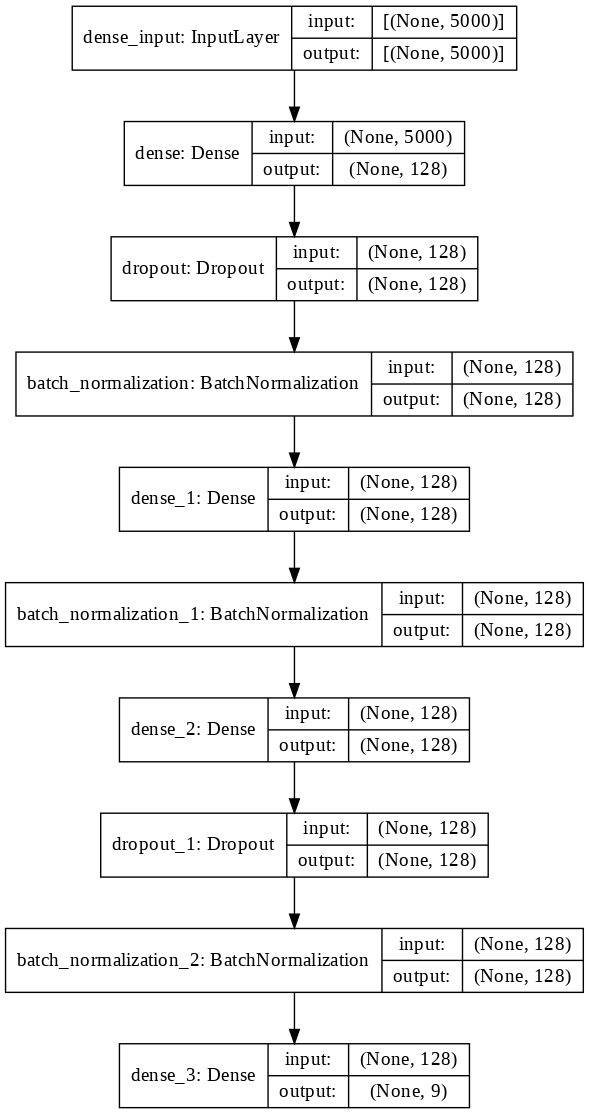

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=m_train.shape[1], activation="sigmoid"))
model.add(Dropout(0.38))
model.add(BatchNormalization())
model.add(Dense(128, activation="sigmoid"))
model.add(BatchNormalization())
model.add(Dense(128, activation="sigmoid"))
model.add(Dropout(0.38))
model.add(BatchNormalization())
model.add(Dense(9, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
plot_model(model, show_shapes=True, expand_nested=True, show_layer_names=True, dpi=100)

# Обучение модели

In [ ]:
checkpointer = ModelCheckpoint(
    filepath=os.path.join(ROOT_PATH, 'best.h5'), 
    monitor='val_accuracy',
    mode='max',
    verbose=1, 
    save_best_only=True
)

history = model.fit(
    m_train, 
    y_train, 
    epochs=100,
    batch_size=32,
    validation_split = 0.2,
    callbacks=[checkpointer]
)

# model.load_weights(os.path.join(ROOT_PATH, 'best.h5'))
# results = model.evaluate(m_test, y_test, batch_size=32)
# print('\nРЕЗУЛЬТАТ:')
# print('test loss, test acc:', results)

model.save_weights(os.path.join(ROOT_PATH, 'best.h5'))

Epoch 1/100
3/3 [==============================] - 2s 160ms/step - loss: 3.0772 - accuracy: 0.0833 - val_loss: 2.2477 - val_accuracy: 0.0000e+00

Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to /content/drive/MyDrive/Colab Notebooks/ЦП 2021/best.h5
Epoch 2/100
3/3 [==============================] - 0s 14ms/step - loss: 2.3823 - accuracy: 0.1786 - val_loss: 2.2498 - val_accuracy: 0.0000e+00

Epoch 00002: val_accuracy did not improve from 0.00000
Epoch 3/100
3/3 [==============================] - 0s 15ms/step - loss: 2.0708 - accuracy: 0.2976 - val_loss: 2.2425 - val_accuracy: 0.0000e+00

Epoch 00003: val_accuracy did not improve from 0.00000
Epoch 4/100
3/3 [==============================] - 0s 16ms/step - loss: 2.0455 - accuracy: 0.2976 - val_loss: 2.2361 - val_accuracy: 0.0000e+00

Epoch 00004: val_accuracy did not improve from 0.00000
Epoch 5/100
3/3 [==============================] - 0s 16ms/step - loss: 1.5711 - accuracy: 0.4643 - val_loss: 2.2233 - val_acc

# График обучения нейросети

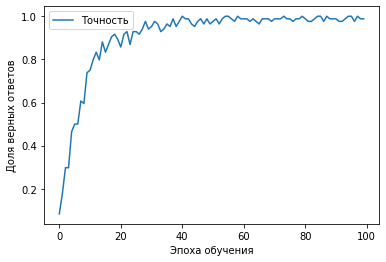

In [ ]:
# Оображаем график точности обучения
plt.plot(history.history['accuracy'], label='Точность')
# plt.plot(history.history['val_accuracy'], label='Проверочная выборка')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

# Сохраним модель

In [ ]:
model.save(os.path.join(ROOT_PATH, 'model.h5'))